<a href="https://colab.research.google.com/github/kevingonzalezd/kevingonzalezd/blob/main/decifrando_texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar librerías y archivo de texto

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import requests
import itertools
from itertools import permutations
import nltk
from nltk.corpus import words

In [ ]:
# importamos nuestro archivo txt cifrado
response = requests.get("https://raw.githubusercontent.com/kevingonzalezd/csv/main/MENSAJE.txt")
texto_cifrado = response.text
texto_cifrado


'wmn aoauthm s emnvo a n ydaero  moa e frhoni wf oei hs s rtoiwtfci tie;adnn oht t,a  o suyal eislw ev,ale h seteetpr agbe omlr h fetou arnetr fuoetoa wnm dtenh arent u ueot rafci tif nonsuoe. v dlhv  eaiikdhersh utde  fcy otigtm noacn o ouinloscpntu o s wetehqet suon-oowsinaden mitofic rmi aen of, sn sir aamcnao  re,edncnovuls  rbdopem.be sl not iue odtrraesm k eaemm osiad  ngig nomod to  a  hitwnt ao co ohywshwi  ourieavr a h ttd pnsioinaoob i h tetuo noamrtem  hde. n yoa o gmigt no ivlpeoednyuio  pee srrea cs nlyau lf redefn siy ala hctn tan ireftooh  h hgwtuhldce iet mo  ikth nts pi .hhp rsae  afliibr  eayeiehd t,tesh arjdpue e,tc sitleai heidbnh hsst i tmnaeetyuw  otlfnli ita  thde ahhyt oeemsvernbia uo  npgmnao ew oedmsnpnfu o to.cniia n at rt, eayhnaw e ujcseb i i hstl ohcygrvrteona-nialsayq  ndsineotubu ato xi es sa-nhottcno naehp  eot eloltth rtte h ot .u a encnl hnsyo o wwhoecmna ot o hoe htdawle pvoreinon oi oseednod h.l '

# Análisis inicial

Lo primero que hacemos es tratar de intuir si el idioma original del texto es en inglés y si en la permutación solamente se reordenaron las letras con alguna , o si hubo algun tipo de cifrado afín o de césar.

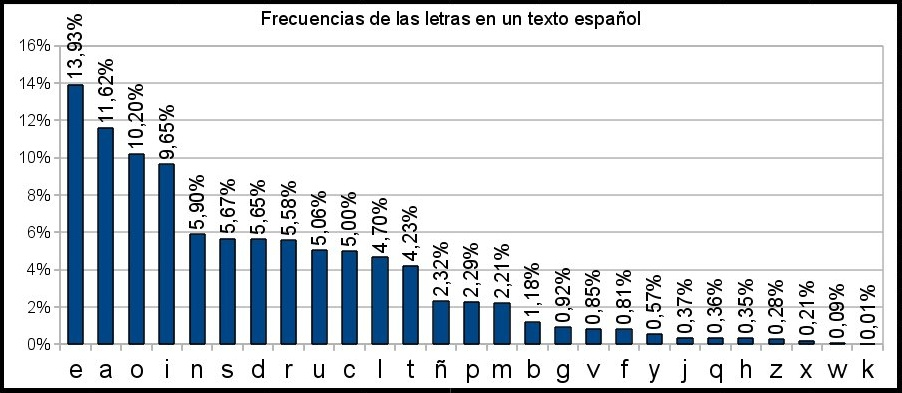

https://es.quora.com/Cu%C3%A1l-es-la-letra-que-m%C3%A1s-se-usa-en-el-idioma-espa%C3%B1ol

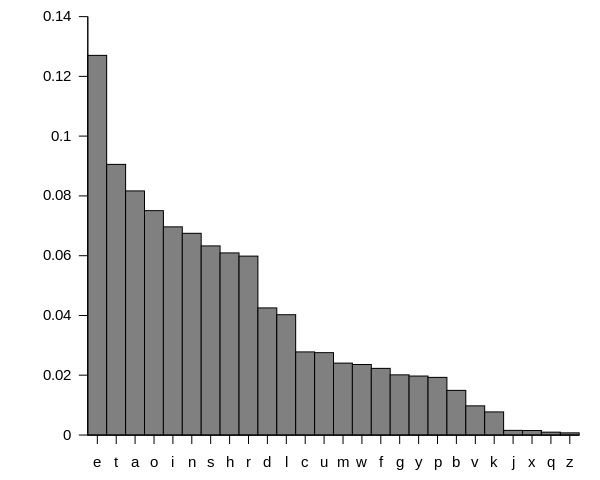

https://es.m.wikipedia.org/wiki/Archivo:English_letter_frequency_%28frequency%29.svg


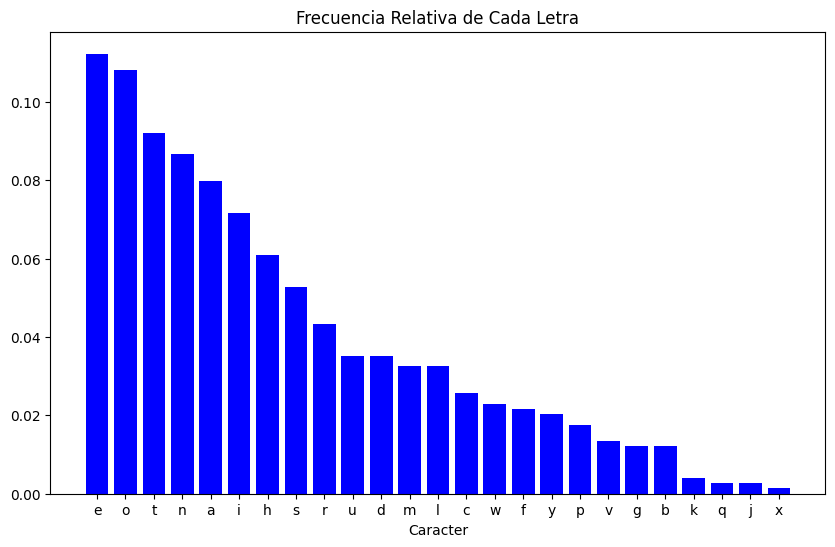

In [ ]:
text=texto_cifrado
text = text.replace(" ", "").replace(".", "").replace(",", "").replace("-", "").replace(";", "")

#frecuencia de cada carácter
char_contar = Counter(text)

#frecuencia relativa
total_chars = sum(char_contar.values())
char_freq = {char: count / total_chars for char, count in char_contar.items()}


#ordenar las letras
ordenadas = dict(sorted(char_freq.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(10, 6))
plt.bar(ordenadas.keys(), ordenadas.values(), color='blue')
plt.xlabel('Caracter')
plt.title('Frecuencia Relativa de Cada Letra')
plt.show()

Analizando las gráficas vemos que las letras t,h preservar su frecuencia del idioma inglés, en comparación con el español que son muy bajas, por lo que podemos intuir que el texto original está en inglés.

Ademas la frecuencia de las letras e,a,o.. siguen siendo altas y las k,q,j,x son bajas, por lo que podemos intuir que no hubo un cambio de letras como un cifrado cesar, porque sino hubieran cambiado sus frecuencias, pero parecen preservarse las frecuencias relativas.

# Explorando el mensaje

Como ya llegamos a la conclusión de nuestro análisis inicial que la permutación es solamente un cambio en el orden de las letras. Además podemos decir que el texto está dividido por bloques para aplicarles la permutación y como tenemos 945 caracteres eso significa que el tamaño de los bloques debe ser un divisor de 945.

In [ ]:
def calcular_divisores(numero):
    divisores = []

    for i in range(1, numero // 2 + 1):
        # si el número es divisible por i lo agregamos
        if numero % i == 0:
            divisores.append(i)

    divisores.append(numero)
    return divisores

numero = 945
divisores = calcular_divisores(numero)
divisores

[1, 3, 5, 7, 9, 15, 21, 27, 35, 45, 63, 105, 135, 189, 315, 945]

Como vemos que las primeras tres letras del texto son wmn, si el bloque fuera de 3 letras las permutaciones posibles serian wmn, wnm, mwn, mnw, nwm, nmw y ninguna tiene sentido, por lo que podemos ddecir que el mínimo tamaño de bloque posible debe ser de al menos 5 caracteres.

El plan a seguir es empezar con el bloque más pequeño posible (5), tomar las primeras 5 letras ver todas las permutaciones posibles y seleccionar aquellas que se encuentren en el diccionario de words de la librería nltk, y ver si hay, en dado caso que encontremos algo analizamos las últimas 5, o las siguientes 5 y asi sucesivamente haste encontrar un patrón, si no las hay pasamos con un tamaño más grande y repetimos el proceso,

## Bloques de tamaño 5

In [ ]:
texto_cifrado[:5]

'wmn a'

In [ ]:
#descargar los conjuntos de datos de palabras en inglés
nltk.download('words')
nltk.download('brown')

palabras_ingles = set(words.words())
letras = texto_cifrado[:5]

# generar todas las permutaciones posibles de las 5 letras del bloque
permutaciones = permutations(letras)

# convertir las permutaciones + a cadenas de texto
lista_permutaciones = [''.join(perm) for perm in permutaciones]

# Crear una nueva lista para almacenar los fragmentos de palabras
nueva_lista = []

# dividir cada permutación en fragmentos
for palabra in lista_permutaciones:
    fragmentos = palabra.split(' ')
    nueva_lista.extend(fragmentos)

# ordenar la lista de fragmentos por longitud
nueva_lista.sort(key=len, reverse=True)

# filtrar las permutaciones que sean palabras "válidas"
frases_con_sentido = [frase for frase in nueva_lista if frase in palabras_ingles]

# imprimir las primeras 20, las más largas, porque sino erían letras o algo así
if frases_con_sentido:
    for frase in frases_con_sentido[0:20]:
        print(frase)
else:
    # Si no hay ninguna frase con sentido, imprimir un mensaje
    print("No hay")


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


man
nam
wan
wan
naw
awn
maw
man
maw
naw
nam
awn
na
an
ma
am
wa
wa
na
an


vemos que esá la palabras "man" por lo que puede tener sentido un bloque de 5, analizamos las últimas 5 letras:

Ahora analizamos las últimas 5 letras:

In [ ]:
texto_cifrado[-5:]

' h.l '

In [ ]:
letras = texto_cifrado[-5:]
permutaciones = permutations(letras)
lista_permutaciones = [''.join(perm) for perm in permutaciones]

nueva_lista = []

for palabra in lista_permutaciones:
    fragmentos = palabra.split(' ')
    nueva_lista.extend(fragmentos)


nueva_lista.sort(key=len, reverse=True)

frases_con_sentido = [frase for frase in nueva_lista if frase in palabras_ingles]

if frases_con_sentido:
    for frase in frases_con_sentido[0:20]:
        print(frase)
else:
    print("No hay")

l
h
h
l
h
h
l
l
h
h
l
h
h
l
h
h
l
l
l
l


como hay un punto final vemos que no hay forma en que se puedan acomodar para que tenga sentido, por lo que pasamos al siguiente tamaño de bloque

## Bloques de 7 letras

In [ ]:
texto_cifrado[0:7]

'wmn aoa'

In [ ]:
letras = texto_cifrado[0:7]
permutaciones = permutations(letras)
lista_permutaciones = [''.join(perm) for perm in permutaciones]

nueva_lista = []

for palabra in lista_permutaciones:
    fragmentos = palabra.split(' ')
    nueva_lista.extend(fragmentos)


nueva_lista.sort(key=len, reverse=True)

frases_con_sentido = [frase for frase in nueva_lista if frase in palabras_ingles]

if frases_con_sentido:
    for frase in frases_con_sentido[0:20]:
        print(frase)
else:
    print("No hay")

mowana
mowana
mowana
mowana
woman
woman
woman
woman
anoa
anoa
mona
moan
mano
noma
mana
mana
naam
naam
anam
anam


encontramos la palabra woman que parece tener sentido, vamos con las últimas 7

In [ ]:
texto_cifrado[-7:]

'od h.l '

In [ ]:
letras = texto_cifrado[-7:]
permutaciones = permutations(letras)
lista_permutaciones = [''.join(perm) for perm in permutaciones]

nueva_lista = []

for palabra in lista_permutaciones:
    fragmentos = palabra.split(' ')
    nueva_lista.extend(fragmentos)


nueva_lista.sort(key=len, reverse=True)

frases_con_sentido = [frase for frase in nueva_lista if frase in palabras_ingles]

if frases_con_sentido:
    for frase in frases_con_sentido[0:20]:
        print(frase)
else:
    print("No hay")

hold
hold
hold
hold
hold
hold
hold
hold
hold
hold
hold
hold
old
old
old
old
old
old
old
old


también tiene sentido con el punto decimal y espacio, analizamos el segundo bloque:

In [ ]:
texto_cifrado[7:14]

'uthm s '

In [ ]:
letras = texto_cifrado[7:14]
permutaciones = permutations(letras)
lista_permutaciones = [''.join(perm) for perm in permutaciones]

nueva_lista = []

for palabra in lista_permutaciones:
    fragmentos = palabra.split(' ')
    nueva_lista.extend(fragmentos)


nueva_lista.sort(key=len, reverse=True)

frases_con_sentido = [frase for frase in nueva_lista if frase in palabras_ingles]

if frases_con_sentido:
    for frase in frases_con_sentido[0:20]:
        print(frase)
else:
    print("No hay")

tush
tush
tush
tush
thus
thus
thus
thus
mush
mush
mush
mush
must
stum
smut
must
stum
smut
must
must


vemos que tiene la palabra must, entonces parece ser una buena idea dividir el texto en bloques de tamaño 7

In [ ]:
letras = texto_cifrado[-7:]
permutaciones = permutations(letras)
lista_permutaciones = [''.join(perm) for perm in permutaciones]

nueva_lista = []

for palabra in lista_permutaciones:
    fragmentos = palabra.split(' ')
    nueva_lista.extend(fragmentos)


nueva_lista.sort(key=len, reverse=True)

frases_con_sentido = [frase for frase in nueva_lista if frase in palabras_ingles]

if frases_con_sentido:
    for frase in frases_con_sentido[0:20]:
        print(frase)
else:
    print("No hay")

hold
hold
hold
hold
hold
hold
hold
hold
hold
hold
hold
hold
old
old
old
old
old
old
old
old


In [ ]:
letras = texto_cifrado[-14:-7]
permutaciones = permutations(letras)
lista_permutaciones = [''.join(perm) for perm in permutaciones]

nueva_lista = []

for palabra in lista_permutaciones:
    fragmentos = palabra.split(' ')
    nueva_lista.extend(fragmentos)


nueva_lista.sort(key=len, reverse=True)

frases_con_sentido = [frase for frase in nueva_lista if frase in palabras_ingles]

if frases_con_sentido:
    for frase in frases_con_sentido[0:20]:
        print(frase)
else:
    print("No hay")

dense
dense
needs
needs
donee
donee
nosed
nosed
donee
donee
dense
dense
nosed
nosed
needs
needs
dene
dene
need
need


ahora veremos las permutaciones de estos 3 bloques y vemos si coincide alguna función para asignar el orden

In [ ]:
texto_cifrado[0:7]

'wmn aoa'

In [ ]:
texto = texto_cifrado[0:7]
texto_woman = texto.replace(" ", "+")
vector_caracteres = list(texto_woman)

referencia = "woman"

# convertir letras en una lista de caracteres
letras = list(vector_caracteres)

# Remover las letras de la referencia
for letra in referencia:
    if letra in letras:
        letras.remove(letra)

# generar todas las combinaciones de los elementos restantes
combinaciones = []
for perm in itertools.permutations(letras):
    for i in range(len(perm) + 1):
        nueva_comb = perm[:i] + tuple(referencia) + perm[i:]
        combinaciones.append(''.join(nueva_comb))

combinaciones

['woman+a', '+womana', '+awoman', 'womana+', 'awoman+', 'a+woman']

In [ ]:
texto_woman

'wmn+aoa'

In [ ]:
texto = texto_cifrado[7:14]
texto_must = texto.replace(" ", "+")
vector_caracteres = list(texto_must)

referencia = "must"

# Convertir letras en una lista de caracteres
letras = list(vector_caracteres)

# Remover las letras de la referencia
for letra in referencia:
    if letra in letras:
        letras.remove(letra)

# Generar todas las combinaciones de los elementos restantes
combinaciones = []
for perm in itertools.permutations(letras):
    for i in range(len(perm) + 1):
        nueva_comb = perm[:i] + tuple(referencia) + perm[i:]
        combinaciones.append(''.join(nueva_comb))

combinaciones

['musth++',
 'hmust++',
 'h+must+',
 'h++must',
 'musth++',
 'hmust++',
 'h+must+',
 'h++must',
 'must+h+',
 '+musth+',
 '+hmust+',
 '+h+must',
 'must++h',
 '+must+h',
 '++musth',
 '++hmust',
 'must+h+',
 '+musth+',
 '+hmust+',
 '+h+must',
 'must++h',
 '+must+h',
 '++musth',
 '++hmust']

In [ ]:
texto_must

'uthm+s+'

In [ ]:
texto = texto_cifrado[-7:]
texto_hold = texto.replace(" ", "+")
vector_caracteres = list(texto_hold)

referencia = "hold"

# Convertir letras en una lista de caracteres
letras = list(vector_caracteres)

# Remover las letras de la referencia
for letra in referencia:
    if letra in letras:
        letras.remove(letra)

# Generar todas las combinaciones de los elementos restantes
combinaciones = []
for perm in itertools.permutations(letras):
    for i in range(len(perm) + 1):
        nueva_comb = perm[:i] + tuple(referencia) + perm[i:]
        combinaciones.append(''.join(nueva_comb))

combinaciones

['hold+.+',
 '+hold.+',
 '+.hold+',
 '+.+hold',
 'hold++.',
 '+hold+.',
 '++hold.',
 '++.hold',
 'hold.++',
 '.hold++',
 '.+hold+',
 '.++hold',
 'hold.++',
 '.hold++',
 '.+hold+',
 '.++hold',
 'hold++.',
 '+hold+.',
 '++hold.',
 '++.hold',
 'hold+.+',
 '+hold.+',
 '+.hold+',
 '+.+hold']

In [ ]:
texto_hold

'od+h.l+'

# Decifrando el mensaje

In [ ]:
from itertools import permutations

# función que aplica la permutación al texto
def aplicar_permutacion(text, permutation):
    # crea un nuevo string aplicando la permutación
    return ''.join(text[i] for i in permutation)

# funcipon que verifica si una permutación es consistente con los bloques permutados y los textos cambiados
def verificacion(bloque_permutado, changed_texts, permutation):
    for original, changed in zip(bloque_permutado, changed_texts):
        # aplicanos la permutación al bloque original y comparamos con el bloque cambiado
        if aplicar_permutacion(original, permutation) != changed:
            # si no coinciden, la permutación no es consistente
            return False
    # si todos los bloques coinciden después de aplicar la permutación, decimos que es consistente
    return True


# proporcionamos ejemplos encontrados con sus permutaciones para que encuentre la permutación y posteriormente lo aplique al texto cifrado
bloque_permutado = ["od+h.l+", "uthm+s+", "wmn+aoa"]
bloque_original = ["+hold.+", "+must+h", "a+woman"]

# Generar todas las permutaciones posibles de la longitud del texto
permutaciones_posibles = list(permutations(range(len(bloque_permutado[0]))))

# Buscar las permutaciones consistentes
permutaciones_consistentes = []
for perm in permutaciones_posibles:
    # vwemos si la permutación actual es consistente con el bloque permutado y el bloque original
    if verificacion(bloque_permutado, bloque_original, perm):
        # si es consistente agregamos la permutación a la lista de permutaciones consistentes
        permutaciones_consistentes.append(perm)


# separamos el texto cifrado en bloques de 7 caracteres
blocks = [texto_cifrado[i:i+7] for i in range(0, len(texto_cifrado), 7)]

# Aplicar la permutación a cada bloque
permutacion_bloque = [aplicar_permutacion(block, permutaciones_consistentes[0]) for block in blocks]

# unir los bloques permutados en el texto final
texto_decifrado = ''.join(permutacion_bloque)
print("La función inversa de la permutación encontrada es:", permutaciones_consistentes[0])

print("El texto decifrado es:")
texto_decifrado


La función inversa de la permutación encontrada es: (6, 3, 0, 5, 1, 4, 2)
El texto decifrado es:


'a woman must have money and a room of her own if she is to write fiction; and that, as you will see, leaves the great problem of the true nature of woman and the true nature of fiction unsolved.  i have shirked the duty of coming to a conclusion upon these two questions-women and fiction remain, so far as i am concerned, unsolved problems. but in order to make some amends i am going to do what i can to show you how i arrived at this opinion about the room and the money.  i am going to develop in your presence as fully and freely as i can the train of thought which led me to think this.  perhaps if i lay bare the ideas, the prejudices, that lie behind this statement you will find that they have some bearing upon women and some upon fiction.  at any rate, when a subject is highly controversial-and any question about sex is that-one cannot hope to tell the truth.  one can only show how one came to hold whatever opinion one does hold. '